In [1]:
# GET FILE NAMES OF SAMPLES

from os import listdir, getcwd
from os.path import isfile, join

data_dir = join(getcwd(), 'free-spoken-digit-dataset', 'recordings')

file_names = [f for f in listdir(data_dir) if f[-4:] == '.wav']

In [2]:
# IMPORT DATA, PAD IT, ARRANGE INTO TENSOR

from scipy.io import wavfile
import numpy as np

wavs = []
for f in file_names:
    _, wav = wavfile.read(join(data_dir, f))
    wavs.append(wav)
    
max_length = max([w.shape[0] for w in wavs])
# padded_length is least multiple of 128 greater
# than 512 containing max_length
padded_length = -128 * (-max_length // 128)


padded_wavs = []
for wav in wavs:
    pad_size = padded_length - wav.shape[0]
    left_pad = pad_size // 2
    right_pad = pad_size - left_pad
    padded_wavs.append(np.pad(wav.astype(np.float32) / (2 ** 15), (left_pad, right_pad), mode='constant'))
    
X = np.stack(padded_wavs, axis=0)

In [4]:
from IPython.display import Audio
from IPython import display 

def speak(sample):
    return Audio(sample, rate=8000, autoplay=True)

In [7]:
speak(X[3])

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
speak(X[6])

In [25]:
stft.shape

TensorShape([140, 257])

Text(0, 0.5, 'Log-Scaled Frequency')

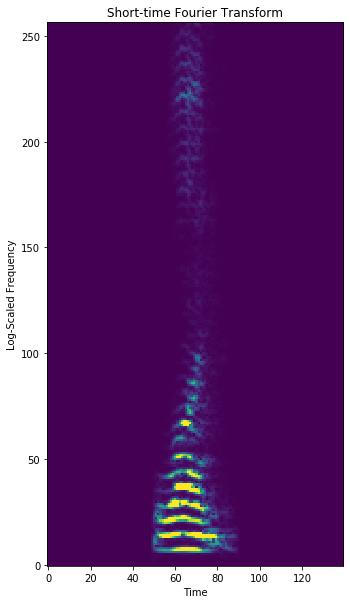

In [31]:
frame_length = 512
frame_step = 128

stft = tf.signal.stft(
            X[6], frame_length, frame_step,
            pad_end=False
    )

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.abs(stft.numpy().T), vmin=0.0, vmax=5.0, origin='lower')
ax.set_title('Short-time Fourier Transform')
ax.set_xlabel('Time')
ax.set_ylabel('Log-Scaled Frequency')